   #  Twenty years of video games - an exploratory analysis

This [Kaggle dataset](https://www.kaggle.com/egrinstein/20-years-of-games) contains information on video games released between 1996 and 2016. Some of the things that I will investigate in this project are:

 1. Popular platforms
 2. Common game genres
 3. Exceptionally popular games
 
 ----

In [71]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import base64
import io
import codecs
from scipy.misc import imread

In [72]:
games=pd.read_csv('ign.csv')
games.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


We can see that each row contains the name and release date of a game as well as information on the genre and popularity score (as determined by users on IGN which was scraped to create this dataset).

In [73]:
#some basic data cleaning

games.drop(['Unnamed: 0','url'],axis=1,inplace=True)
games.drop(games.index[516],inplace=True) #dropping the game released in 1970 which looks erroneous

In [74]:
rows = games.shape[0]
games.shape

(18624, 9)

#### We have data on more than eighteen thousand video games. Let's start asking some questions from our data:

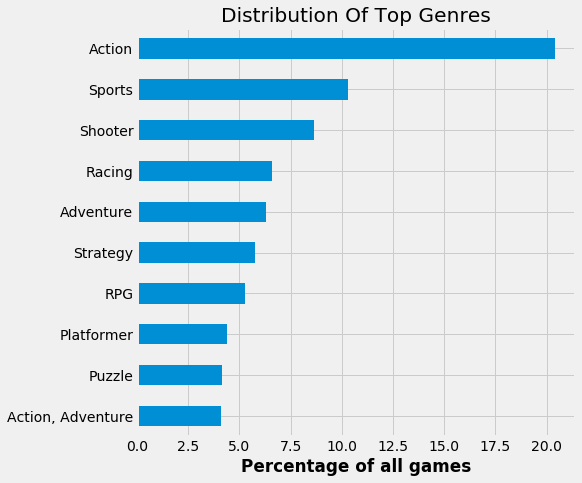

In [75]:
info=games['genre'].value_counts()/rows*100
info[:10].sort_values().plot(kind='barh')
plt.title('Distribution Of Top Genres')
plt.xlabel('Percentage of all games')
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

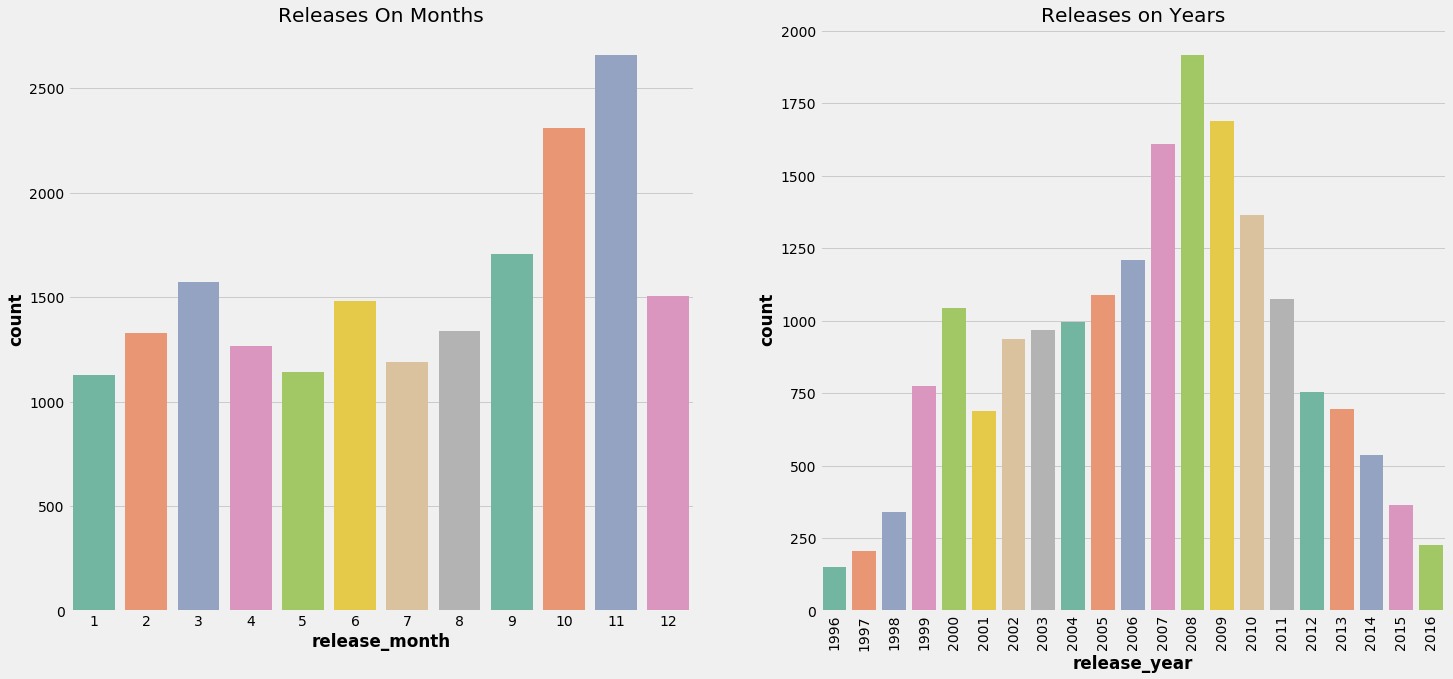

In [76]:
fig,ax=plt.subplots(1,2,figsize=(22,10))
sns.countplot(games['release_month'],ax=ax[0],palette='Set2').set_title('Releases On Months')
plt.ylabel('')
sns.countplot(games['release_year'],ax=ax[1],palette='Set2').set_title('Releases on Years')
plt.xticks(rotation=90)
plt.show()

We can see that the number of releases increases from August to November in the lead up to Black Friday and Christmas before a sharp drop in December.

The number of games released per year rises steadily until 2008 before dropping pretty quickly. Given the increasing popularity of games and the advent of new platforms like mobile gaming over the last few years, this seems unlikely. Further investigation is needed but a simple explanation could be the fact that IGN (the data source) just isn't that popular a game rating website as it used to be (because of competitors like Steam).

In [77]:
games['score'].mean()     #the mean score

6.9503758591065115

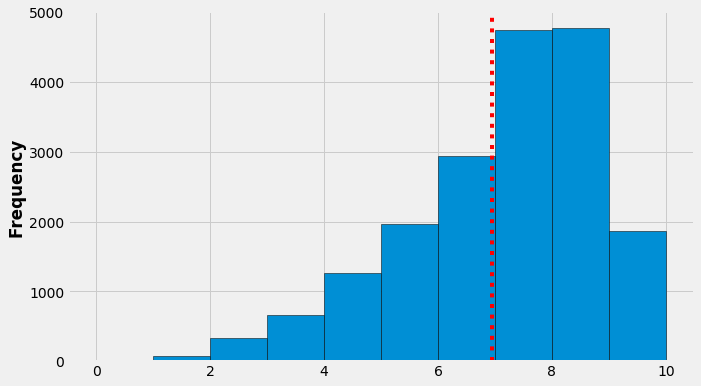

In [78]:
games['score'].plot(kind='hist', edgecolor='black', bins=range(0,11,1))
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axvline(games['score'].mean(),color='r',linestyle='dotted')

The scores appear to be skewed to the left with a majority of the scores in the 6 to 9 range.

Text(0.5, 1.0, 'Top Platforms For Games')

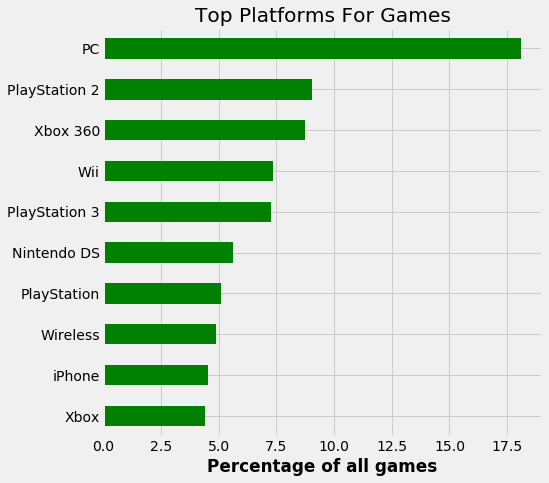

In [97]:
info=games['platform'].value_counts()/rows*100
info[:10].sort_values().plot(kind='barh', color='g')
plt.xlabel('Percentage of all games')

fig=plt.gcf()
fig.set_size_inches(7,7)
plt.title('Top Platforms For Games')

Almost 20% of all games were created for the PC. This number, however, pales in comparison to the nearly 40% that were created for consoles.

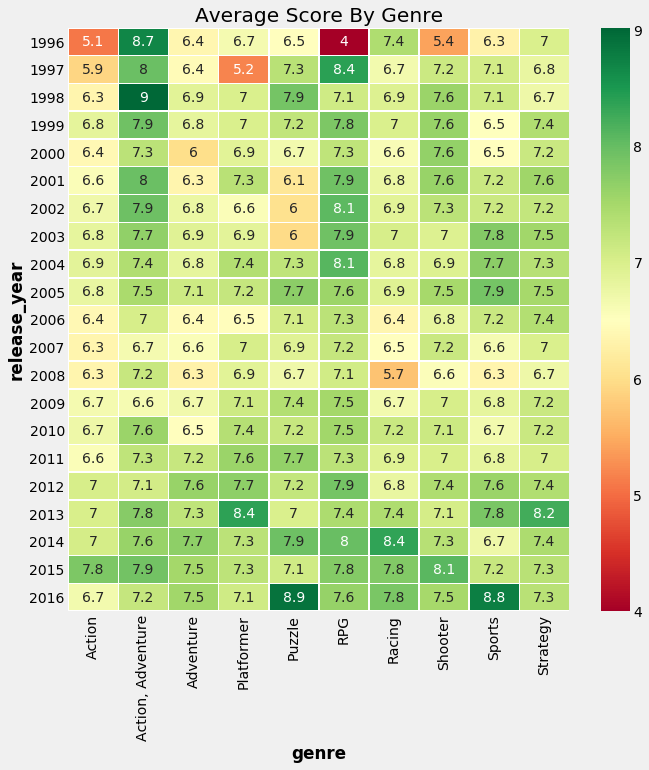

In [102]:
plt.subplots(figsize=(10,10))
max_genres=games.groupby('genre')['genre'].count()
max_genres=max_genres[max_genres.values>600]
max_genres.sort_values(ascending=True,inplace=True)
mean_games=games[games['genre'].isin(max_genres.index)]
abc=mean_games.groupby(['release_year','genre'])['score'].mean().reset_index()
abc=abc.pivot('release_year','genre','score')
sns.heatmap(abc,annot=True,cmap='RdYlGn',linewidths=0.5)
plt.title('Average Score By Genre')
plt.show()

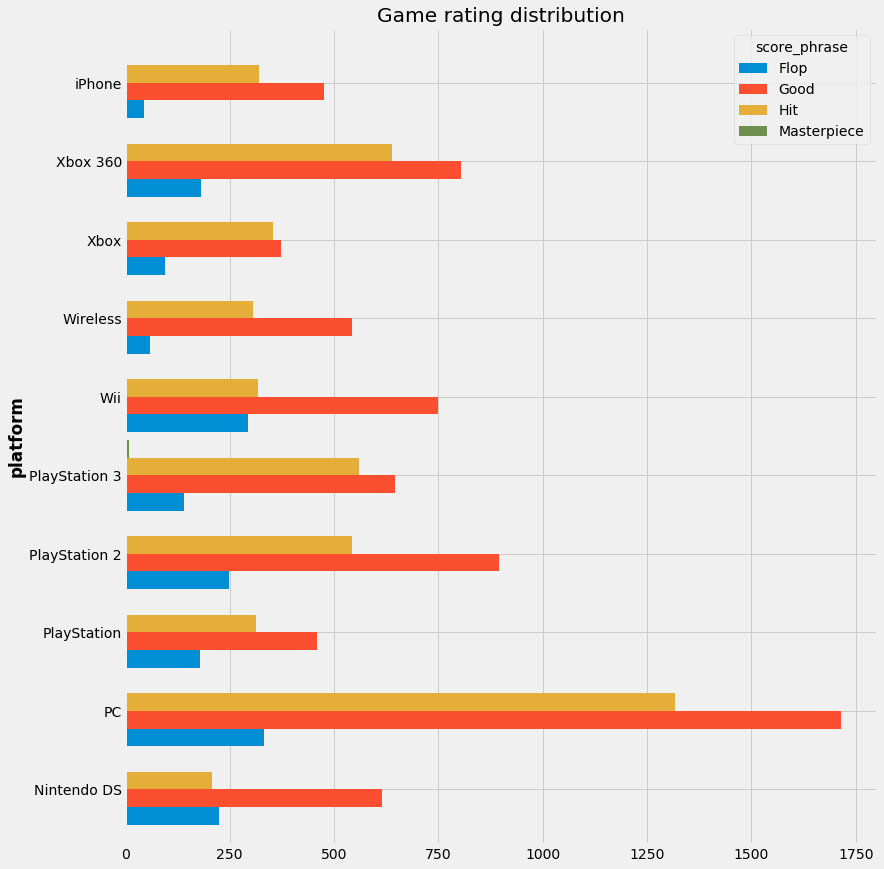

In [103]:
clone=games.copy()
clone['score_phrase']=clone['score_phrase'].map({'Awful':'Flop','Bad':'Flop','Disaster':'Flop','Unbearable':'Flop','Painful':'Flop','Mediocre':'Good','Okay':'Good','Great':'Hit','Amazing':'Hit','Masterpiece':'Masterpiece','Good':'Good'})
clone=clone[['score_phrase','platform','genre','score']]
max_platforms=clone['platform'].value_counts().index[:10]
plat=clone[clone['platform'].isin(max_platforms)]
plat=plat.groupby(['platform','score_phrase'])['score'].count().reset_index()
plat=plat.pivot('platform','score_phrase','score')
plat.plot.barh(width=0.9)
fig=plt.gcf()
fig.set_size_inches(12,14)
plt.title('Game rating distribution')
plt.show()

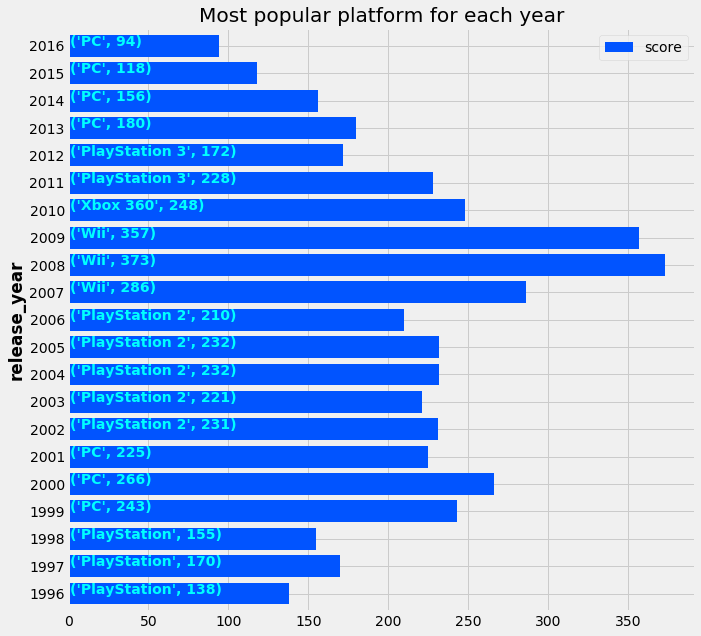

In [104]:
new=games.groupby(['release_year','platform'])['score'].count().reset_index()
#new.columns=[['release_year','platform','count']]
new=new.sort_values(by='score',ascending=False)
new=new.drop_duplicates(subset=['release_year'],keep='first')
new=new.sort_values(by='release_year')
new.set_index('release_year',inplace=True)
new.plot.barh(color='#0154ff',width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,10)
for i, p in enumerate(zip(new.platform, new['score'])):
    plt.text(s=p,x=1,y=i,fontweight='bold',color='cyan')
plt.title('Most popular platform for each year')
plt.show()